Including Braket notation
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
 $\newcommand{\ket}[1]{\left|{#1}\right\rangle}$

# Project


## Project : Qsite hacks Classiq Open Project

### Problem Statement
The challenge is to solve the differential equation given in the [Q-SITE Classiq Open Challenge](https://github.com/QSITE-Hacks/Q-SITE-Classiq-Open-Challenge) by using the algorithm described in [A Quantum Algorithm for Solving Linear Differential Equations: Theory and Experiment](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.101.032307). Our focus will be on the second-order linear differential equation:

$$
y'' + \omega^2 y = 0
$$

### Mathematical Formulation
We can reformulate the given equation as follows:

$$
\frac{d}{dt}\begin{pmatrix}y(t) \\ y'(t)\end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -\omega^2 & 0 \end{pmatrix} \begin{pmatrix}y(t) \\ y'(t))\end{pmatrix}
$$

By comparing this with the standard form presented in the reference paper:

$$
\frac{d}{dt} \mathbf{x}(t) = M \mathbf{x}(t) + \mathbf{b}
$$

we identify the following variables:
- $$\mathbf{x}(t) = \begin{pmatrix} y(t) \\ y'(t) \end{pmatrix}$$  

- $$M = \begin{pmatrix} 0 & 1 \\ -\omega^2 & 0 \end{pmatrix}$$  

- $$\mathbf{b} = \mathbf{0}$$

### Solution Approach
The solution for the vector $\mathbf{x}(t)$ can be expressed as:

$$
\mathbf{x}(t) = e^{Mt} \mathbf{x}(0) + (e^{Mt} - I) \mathbf{b}
$$

Since $\mathbf{b} = \mathbf{0}\ \$ we simplify this to:

$$
\mathbf{x}(t) = e^{Mt} \mathbf{x}(0)
$$

We can approximate this expression up to $k$ terms as:

$$
\mathbf{x}(t) = \sum_{m=0}^{k} \frac{(Mt)^m}{m!} \mathbf{x}(0)
$$

where   
$$\mathbf{x}(0) = \begin{pmatrix} y(0) \\ y'(0) \end{pmatrix} = \begin{pmatrix} 1 \\ 1 \end{pmatrix} ,\quad \text{with}\ \ |\mathbf{x}(0)\| = \sqrt{2}$$

### Quantum State Representation
To interpret $$\mathbf{x}(t)$$ as a quantum state, we express it as:

$$
|x(0)\rangle = \frac{\mathbf{x}(0)}{\|\mathbf{x}(0)\|} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

We can define an operator $A$ as:

$$
A = \sum_{i,j} M_{ij} \|M\| \quad \text{when } \omega = 1, \quad \|M\| = 1
$$

Thus, we have:

$$
|x(t)\rangle = \sum_{m=0}^{k} \frac{\|\mathbf{x}(0)\| (\|M\| t)^m}{m!} |x(0)\rangle
$$

To further simplify, we set:

$$
C_m = \frac{\|\mathbf{x}(0)\| (\|M\| t)^m}{m!} = \frac{2^{1/2} (t)^m}{m!}
$$

and

$$
U_m = A^m
$$

Resulting in the expression:

$$
|x(t)\rangle = \frac{1}{C} \sum_{m=0}^{k} C_m U_m |x(0)\rangle
$$

where $$C = \sqrt{\sum_{m=0}^{k} C_m}$$.

### Evaluating Kinetic and Potential Energy
To analyze the system's kinetic and potential energy, we can discretize the time interval $[0, 1]$ into small steps, allowing us to compute the energy values at each point in time. The kinetic energy $K(t)$ and potential energy $V(t)$ can be derived from the states $y(t)$ and $y'(t)$:

- **Kinetic Energy**:  
 for simplicity let's take mass = 1
$$K(t) = \frac{1}{2} (y'(t))^2 $$
- **Potential Energy**:  
given $ω = 1$ and we assumed mass = 1, we can write k(spring constant) = 1 too.
$$
V(t) = \frac{1}{2} (y(t))^2
$$

By applying the algorithm iteratively over the time steps, we can evaluate how the kinetic and potential energy vary throughout the interval.

### Analysis of Varying Bounds
When using functions that require bounds, such as `inplace_prepare_state()`, we can experiment with different k-values, which determine number of qubits in second-ancillary qubit register, to observe how they influence the computed energy values. This analysis will provide insights into the sensitivity of the quantum state representation with respect to varying parameter settings.

### Circuit Optimization: Count Gate Analysis
When optimizing the quantum circuit for either width or depth, it is crucial to analyze the count of gates used in the circuit. The depth of the circuit impacts the speed of execution, while the width affects the resource consumption in terms of qubits. By measuring the number of controlled operations needed for the desired state preparation, we can identify potential optimizations that balance these factors, leading to a more efficient implementation of the quantum algorithm.

### Conclusion
This draft outlines our approach to represent the quantum state derived from the given differential equation and evaluate the kinetic and potential energy throughout the time interval. Additionally, we address the implications of varying bounds in the state preparation functions and discuss the optimization of the quantum circuit through gate count analysis.

---



# Let's figure out the circuit

$ y''+ ω^2y = 0$  
We can write given equation as:  

$\frac{d}{dt} \begin{pmatrix} y(t) \\ y'(t)\end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -ω^2 & 0 \end{pmatrix} \begin{pmatrix} y(t) \\ y'(t) \end{pmatrix}$

Comparing it with the equation in paper:  
$\frac{d}{dt} x⃗(t) = M x⃗(t) + b⃗$

we get $\ x⃗(t) = \begin{pmatrix} y(t) \\ y'(t)\end{pmatrix}$ , $\ M = \begin{pmatrix} 0 & 1 \\ -ω^2 & 0 \end{pmatrix} \ ,  b⃗ = 0$


The solution can be given as   
$ x(t) = e^{Mt}x(o) + (e^{Mt} - I )b$

Since in our case b = 0
our equation is simply:
$ x(t) = e^{Mt}x(o)$  
which we can approximate to k terms as:  
$ x(t) = \sum\limits_{m = 0}^{k} \frac{(Mt)^m}{m!} x(0)$






where $x(0) = \begin{pmatrix} y(0) \\ y'(0) \end{pmatrix} = \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \lVert x(0) \rVert = \sqrt 2 $  
Now we want $x(t)$ to represent a quantum state, then we can write a vector $\ket{x(0)} = \frac{x(0)}{\lVert x(0) \rvert}$

we can write an operation $A = \sum\limits_{i,j} \frac{M_{ij}}{\lVert M \rVert} \\when\ ω = 1\ , \lVert M \rVert = 1 , \\ $  

After this our equation becomes:  
$\ket{x(t)} = \sum\limits_{m = 0}^{k} \frac{\lVert x(0) \rVert (\lVert M \rVert A t)^m}{m!} \ket{x(0)}$



To simplify things a bit we write $C_{m} = \frac{\lVert x(0) \rVert (\lVert M \rVert t)^m}{m!} = \frac{\sqrt2 (t)^m}{m!}\ \ and\ \ U_m = A^m $
Our equation becomes:
$\ket {x(t)} = \frac{1}{C^2}\sum\limits_{m = 0}^{k} C_mU_m \ket {x(0)}$  
  where $C = \sqrt{\sum\limits_{m = 0}^{k}C_m}$

Now to reach to this quantum state, we use two ancillary qubit registers, one with one qubit and other one with k qubits.We also use one work qubit which represents $\ \ket {x(t)}\ $  because it is only two dimensional.



The circuit steps are as follows:  


1.   We initiate the work qubit in $\ \ket{x(0)}\ = \frac{1}{\sqrt2}\begin{pmatrix} 1\\ 1 \end{pmatrix}$ by using Hadamard transform.
2.   We initiate the K-qubits in superposition of $2^k$ states having amplitudes $C_m$ by a matrix $V_s$.
3.  Then we perform controlled unitary operations on work qubit where control is the different numerical states in K-qubits register.  
4.  Then we apply V_s dagger on K-qubits, and measure the work qubits.
The subspace where K-qubits are in state $\ket{0}^{⊗k}$.
5. The work qubit's amplitudes are the result
of $y$ and $y'$ for a given $t $ upto a normalization.










# Circuit Implementation using Classiq
Installing, authenticating and importing Classiq


In [ ]:
!pip install -U classiq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.1/492.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing instal

In [ ]:
import classiq
classiq.authenticate()

Your user code: DXRN-LQZJ
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=DXRN-LQZJ


In [ ]:
from classiq import *
from classiq.execution import ExecutionPreferences
import math
import numpy as np

Refrencing to the variables that we have:
$C_m = \frac{\sqrt2 (t)^m}{m!} ,\quad U_m = A^m, \quad A = \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix}$

In [ ]:
A = np.array([[0,1],[-1,0]]) #Defining A matrix
k = 3
K_matrix = 2**k

#Calculating C_m array
def C_m(t, k):
  C_m = np.array([np.sqrt(np.sqrt(2)*t**m/ math.factorial(m)) for m in range(k)])
  return C_m


@qfunc
def apply_U_m(y: QNum, x: QBit): # Defining a function to apply U_m matrix iterations to work qubit x
  for i in range(K_matrix):
    U_m = np.linalg.matrix_power(A,i)
    U_m = U_m.tolist() # Change to a for loop to iterate and pass x as QBit
    control(y == i, lambda: unitary(U_m, x))


Defining a generate_unitary_matrix function to create a unitary matrix V_s given the column C_m using grahm-schmidt method, which will be used to create the superposition of ancillary qubits.

In [ ]:
# defining a function to create matrix V_s from the column of C_m
def generate_unitary_matrix(column):
  """Generates a unitary matrix given a single column.

  Args:
    column: A numpy array representing a single column of the matrix.

  Returns:
    A numpy array representing the unitary matrix.
  """

  column = column / np.linalg.norm(column)
  matrix = np.zeros((len(column), len(column)), dtype=complex)
  matrix[:, 0] = column


  for i in range(1, len(column)):
    orthogonal_vector = np.random.rand(len(column)).astype(complex)
    for j in range(i):
      orthogonal_vector -= np.dot(orthogonal_vector, matrix[:, j]) * matrix[:, j]
    orthogonal_vector = orthogonal_vector / np.linalg.norm(orthogonal_vector)
    matrix[:, i] = orthogonal_vector

  return matrix

In [ ]:

# Defining a function that will simulate the circuit on classiq at different points in the time interval [0,1]
# It's arguments are k (the number of ancillary qubits) and opt(optimization parameter)

def sol_state(k, opt):
  #No. of k_qubits that we are using
  K_matrix = 2**k #Dimension of V_s matrix

  # Defining lists to hold the counts for state |00..ktimes>|0> and |00...ktimes>|1>
  res_0 = []
  res_1 = []

  # Splitting the time interval [0,1] to calculate |x(t)>
  time = [x*0.1 for x in range(11)]
  #time = [0, 0.5 , 1]

  for t in time:


    C_C = (np.linalg.norm(C_m(t,K_matrix))) # The norm of all C_m
    C_C = C_C**2 # normalization factor C^2

    #Generating the matrix V_s to initiate k-qubits in superposition with C_m as coefficients
    # converting the matrices to lists to apply unitary(U, x) function
    V_s1 = generate_unitary_matrix(C_m(t,K_matrix))
    V_s1_dg = V_s1.conj().transpose() # defining V_s_dagger
    V_s1 = V_s1.tolist()
    V_s1_dg = V_s1_dg.tolist()


    @qfunc
    def main(x: Output[QBit], z: Output[QNum]): # x - work qubit, z = k ancillary qubits

        allocate(k, z)
        allocate(1, x)
        hadamard_transform(x)  # creates a uniform superposition
        unitary(V_s1, z)   # initiating  ancillary qubits
        apply_U_m(z,x)     # applying U_m tranformations
        unitary(V_s1_dg, z)  # applying V_s dagger on ancillary qubits



    qmod = create_model(main)  # creating the model

    #optimizaion
    if opt == 'width' or opt == 'depth':

      quantum_model_with_constraints = set_constraints(qmod, Constraints(optimization_parameter=opt))

      quantum_model = set_execution_preferences(
      qmod,ExecutionPreferences(
        num_shots=20000, job_name="qsite - width - 20k", max_depth=300, random_seed=767))


    elif opt == 'None':
      quantum_model = set_execution_preferences(
      qmod,ExecutionPreferences(
        num_shots=20000, job_name="qsite - width - 20k", max_depth=300, random_seed=767
    ),
)

    quantum_program = synthesize(quantum_model) #creating the quantum program
    job = execute(quantum_program)   # executing the program
    results = job.result()[0].value  # getting results from job
    write_qmod(qmod, "qsite-depth-opt")
    circuit_width = QuantumProgram.from_qprog(quantum_program).data.width
    circuit_depth = QuantumProgram.from_qprog(quantum_program).transpiled_circuit.depth
    print(f"The circuit width is {circuit_width} and the circuit_depth is {circuit_depth} for optimization = {opt} for t = {t}")

    counts = results.counts  # getting counts from results

    # counts_0 for state |000... k times>|0> which are proportional to value of our function y
    # counts_1 for state |000... k times>|1> which are proportional to value of our function y'
    counts_0 = counts["0"*k + "0"]
    counts_1 = counts["0"*k + "1"]

    # getting the amplitudes
    y_t = np.sqrt((counts_0 / 20000))*C_C
    y_dash_t = np.sqrt((counts_1 / 20000))*C_C

    #appending them to the lists res_0 and res_1
    res_0.append(y_t)
    res_1.append(y_dash_t)

  return res_0, res_1


res_0_no_opt, res_1_no_opt = sol_state(k, opt="None")



The circuit width is 4 and the circuit_depth is 413 for optimization = None for t = 0.0
The circuit width is 4 and the circuit_depth is 406 for optimization = None for t = 0.1
The circuit width is 4 and the circuit_depth is 415 for optimization = None for t = 0.2
The circuit width is 4 and the circuit_depth is 411 for optimization = None for t = 0.30000000000000004
The circuit width is 4 and the circuit_depth is 413 for optimization = None for t = 0.4
The circuit width is 4 and the circuit_depth is 413 for optimization = None for t = 0.5
The circuit width is 4 and the circuit_depth is 415 for optimization = None for t = 0.6000000000000001
The circuit width is 4 and the circuit_depth is 413 for optimization = None for t = 0.7000000000000001
The circuit width is 4 and the circuit_depth is 415 for optimization = None for t = 0.8
The circuit width is 4 and the circuit_depth is 413 for optimization = None for t = 0.9
The circuit width is 4 and the circuit_depth is 415 for optimization = Non

In [ ]:
res_0_width_opt, res_1_width_opt = sol_state(k, opt="width") #results for width optimization

The circuit width is 4 and the circuit_depth is 413 for optimization = width for t = 0.0
The circuit width is 4 and the circuit_depth is 415 for optimization = width for t = 0.1
The circuit width is 4 and the circuit_depth is 407 for optimization = width for t = 0.2
The circuit width is 4 and the circuit_depth is 413 for optimization = width for t = 0.30000000000000004
The circuit width is 4 and the circuit_depth is 410 for optimization = width for t = 0.4
The circuit width is 4 and the circuit_depth is 410 for optimization = width for t = 0.5
The circuit width is 4 and the circuit_depth is 411 for optimization = width for t = 0.6000000000000001
The circuit width is 4 and the circuit_depth is 413 for optimization = width for t = 0.7000000000000001
The circuit width is 4 and the circuit_depth is 411 for optimization = width for t = 0.8
The circuit width is 4 and the circuit_depth is 409 for optimization = width for t = 0.9
The circuit width is 4 and the circuit_depth is 406 for optimiza

In [ ]:
res_0_depth_opt, res_1_depth_opt = sol_state(k, opt="depth") #results for depth optimization

The circuit width is 4 and the circuit_depth is 413 for optimization = depth for t = 0.0
The circuit width is 4 and the circuit_depth is 415 for optimization = depth for t = 0.1
The circuit width is 4 and the circuit_depth is 413 for optimization = depth for t = 0.2
The circuit width is 4 and the circuit_depth is 411 for optimization = depth for t = 0.30000000000000004
The circuit width is 4 and the circuit_depth is 413 for optimization = depth for t = 0.4
The circuit width is 4 and the circuit_depth is 411 for optimization = depth for t = 0.5
The circuit width is 4 and the circuit_depth is 411 for optimization = depth for t = 0.6000000000000001
The circuit width is 4 and the circuit_depth is 409 for optimization = depth for t = 0.7000000000000001
The circuit width is 4 and the circuit_depth is 415 for optimization = depth for t = 0.8
The circuit width is 4 and the circuit_depth is 410 for optimization = depth for t = 0.9
The circuit width is 4 and the circuit_depth is 409 for optimiza

In [ ]:
#Comparing K.E and P.E values for different optimizations

#Intialising list to hold K.E and P.E values at different times and different optimizations

KE_no_opt = []
PE_no_opt = []
KE_width_opt = []
PE_width_opt = []
KE_depth_opt = []
PE_depth_opt = []

for i in range(len(res_0_no_opt)):
  #Appending values of kinetic and potential energy
  KE_no_opt.append(0.5*res_1_no_opt[i]**2)
  PE_no_opt.append(0.5*res_0_no_opt[i]**2)
  KE_width_opt.append(0.5*res_1_width_opt[i]**2)
  PE_width_opt.append(0.5*res_0_width_opt[i]**2)
  KE_depth_opt.append(0.5*res_1_depth_opt[i]**2)
  PE_depth_opt.append(0.5*res_0_depth_opt[i]**2)

print(KE_no_opt)
print(PE_no_opt)
print(KE_width_opt)
print(PE_width_opt)
print(KE_depth_opt)
print(PE_depth_opt)





[0.4990499999999999, 0.4017193671586973, 0.304630603225958, 0.21346121693341621, 0.1437699407027457, 0.08413081212545359, 0.04050540662370355, 0.008110387454258931, 0.0002476506057558376, 0.014821493489639688, 0.05578623000125978]
[0.5009499999999999, 0.6003805257733588, 0.6951157177920427, 0.7811423277793901, 0.860282826294835, 0.919322800026766, 0.9664855629639427, 0.9977804165602052, 1.0029849533111426, 0.9924351048879148, 0.9428242315444696]
[0.4990499999999999, 0.4017193671586973, 0.304630603225958, 0.21346121693341621, 0.1437699407027457, 0.08413081212545359, 0.04050540662370355, 0.008110387454258931, 0.0002476506057558376, 0.014821493489639688, 0.05578623000125978]
[0.5009499999999999, 0.6003805257733588, 0.6951157177920427, 0.7811423277793901, 0.860282826294835, 0.919322800026766, 0.9664855629639427, 0.9977804165602052, 1.0029849533111426, 0.9924351048879148, 0.9428242315444696]
[0.4990499999999999, 0.4017193671586973, 0.304630603225958, 0.21346121693341621, 0.1437699407027457,

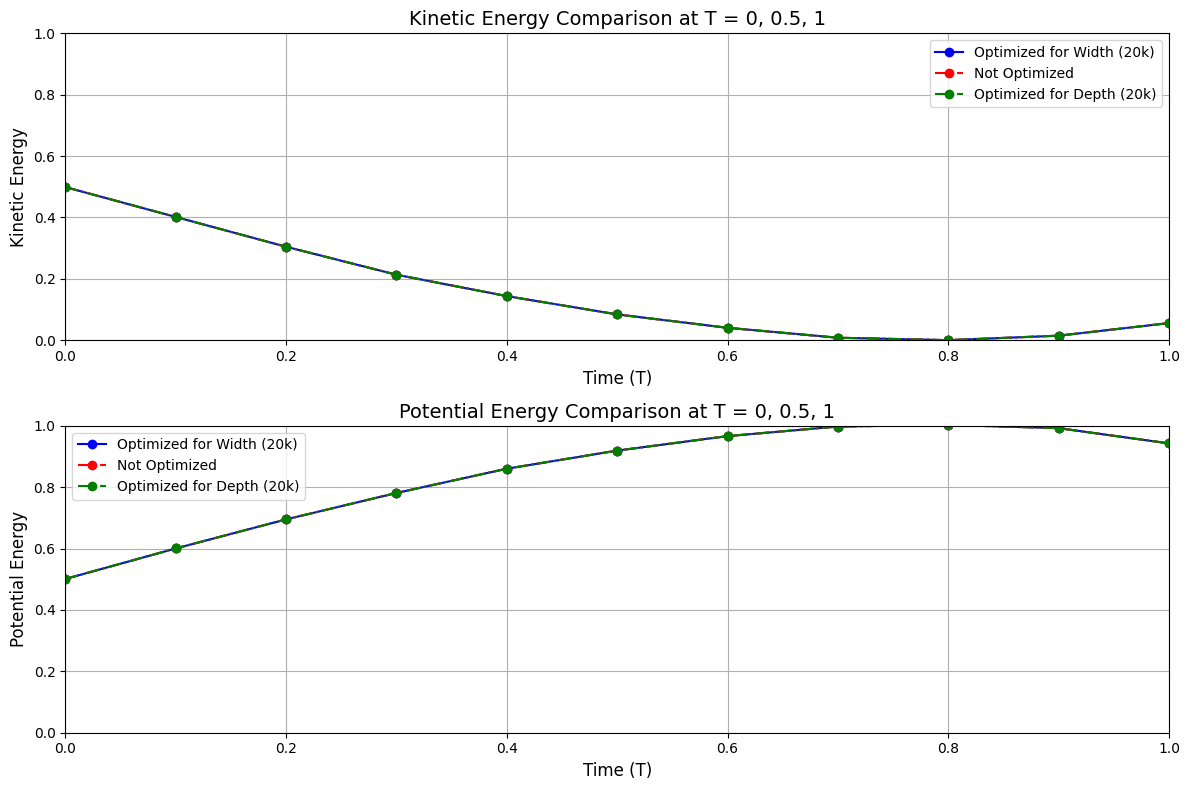

In [ ]:
#Plotting the comparision between different optimization

import matplotlib.pyplot as plt

# Time points
time = [x*0.1 for x in range(11)]
#time = [0, 0.5, 1]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot for Kinetic Energy
ax1.plot(time, KE_width_opt, color='blue', marker='o', linestyle='-', label="Optimized for Width (20k)")
ax1.plot(time, KE_no_opt, color='red', marker='o', linestyle='-.', label="Not Optimized")
ax1.plot(time, KE_depth_opt, color='green', marker='o', linestyle='-.', label="Optimized for Depth (20k)")
ax1.set_title("Kinetic Energy Comparison at T = 0, 0.5, 1", fontsize=14)
ax1.set_xlabel("Time (T)", fontsize=12)
ax1.set_ylabel("Kinetic Energy", fontsize=12)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.legend(loc="best", fontsize=10)
ax1.grid(True)

# Plot for Potential Energy
ax2.plot(time, PE_width_opt, color='blue', marker='o', linestyle='-', label="Optimized for Width (20k)")
ax2.plot(time, PE_no_opt, color='red', marker='o', linestyle='-.', label="Not Optimized")
ax2.plot(time, PE_depth_opt, color='green', marker='o', linestyle='-.', label="Optimized for Depth (20k)")
ax2.set_title("Potential Energy Comparison at T = 0, 0.5, 1", fontsize=14)
ax2.set_xlabel("Time (T)", fontsize=12)
ax2.set_ylabel("Potential Energy", fontsize=12)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.legend(loc="best", fontsize=10)
ax2.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


As the graph shows, there is not much difference in values for K.E and P.E for width or depth opitmization and no optimization.

Our initial equation was  $y'' + ω^2y = 0$  
We know the solution to this can be written as $y = Asin(ωt) + Bcos(ωt) + T$ T is some constant.
and $y' = Acos(ωt) - Bsin(ωt)$, where in our case $𝛚 = 1$  

If we impose the initial conditions $y(0) = 1 $ and $y'(0) = 1$, we get $y = cos(t) + sin(t)$ and $y'(t) = -sin(t) + cos(t)$.  
Kinetic and potential energies can be calculated as:

$K.E = \frac{1}{2}y'(t)^2 = \frac{1}{2}(1 - sin(2t))$  

$P.E = \frac{1}{2}y(t)^2 = \frac{1}{2}(1 + sin(2t))$

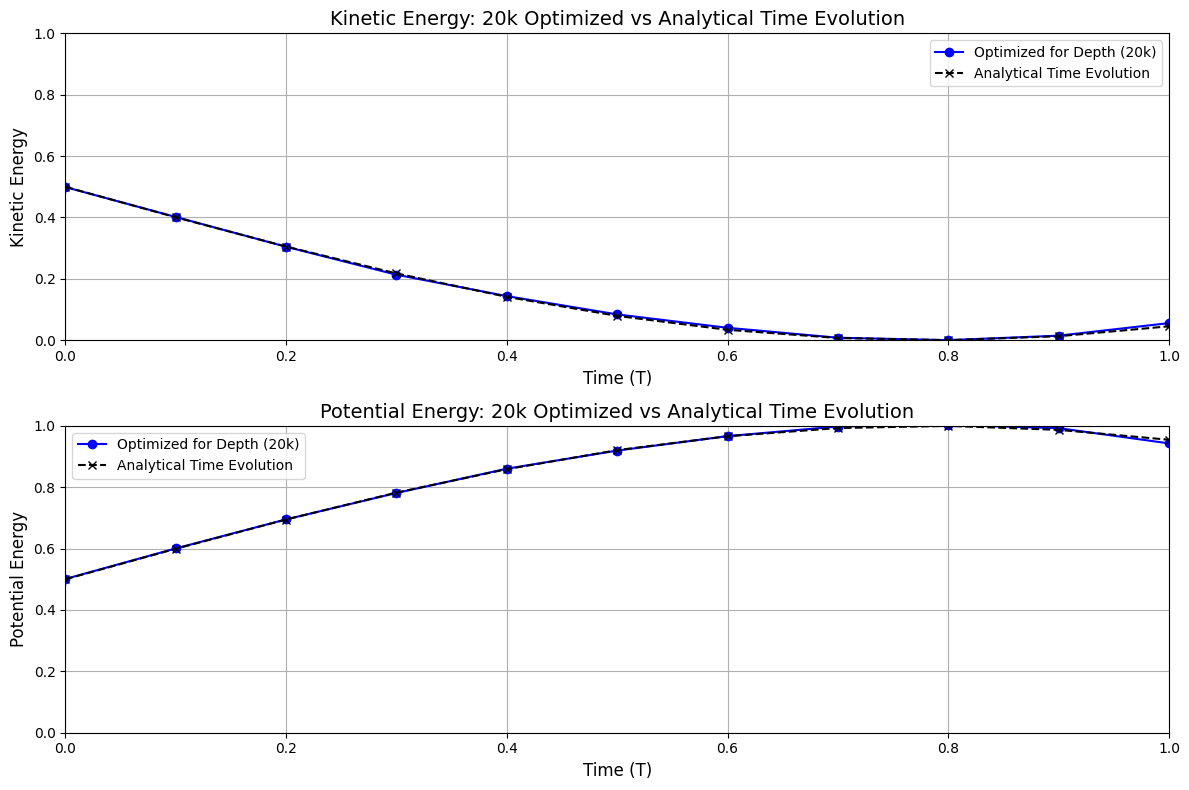

In [ ]:
# Comparing the K.E and P.E values that are obtained from analytical solution and the values obtained by using our quantum method

# Time points
time = [x*0.1 for x in range(11)]
#time = [0, 0.5, 1]


# Parameters
# hbar = 1  # Reduced Planck's constant (for simplicity, hbar = 1)
# omega = 1  # Angular frequency (for simplicity, omega = 1)

# Analytical time-dependent solutions for Kinetic and Potential energies
KE_analytical_time = [(0.5) * (1 - np.sin(2*t)) for t in time]
PE_analytical_time = [(0.5) * (1 + np.sin(2*t)) for t in time]



# Create subplots for Kinetic and Potential Energy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot for Kinetic Energy: 20k Depth Optimized vs Analytical Solution
ax1.plot(time, KE_depth_opt, color='blue', marker='o', linestyle='-', label="Optimized for Depth (20k)")
ax1.plot(time, KE_analytical_time, color='black', marker='x', linestyle='--', label="Analytical Time Evolution")
ax1.set_title("Kinetic Energy: 20k Optimized vs Analytical Time Evolution", fontsize=14)
ax1.set_xlabel("Time (T)", fontsize=12)
ax1.set_ylabel("Kinetic Energy", fontsize=12)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.legend(loc="best", fontsize=10)
ax1.grid(True)

# Plot for Potential Energy: 20k Depth Optimized vs Analytical Solution
ax2.plot(time, PE_depth_opt, color='blue', marker='o', linestyle='-', label="Optimized for Depth (20k)")
ax2.plot(time, PE_analytical_time, color='black', marker='x', linestyle='--', label="Analytical Time Evolution")
ax2.set_title("Potential Energy: 20k Optimized vs Analytical Time Evolution", fontsize=14)
ax2.set_xlabel("Time (T)", fontsize=12)
ax2.set_ylabel("Potential Energy", fontsize=12)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.legend(loc="best", fontsize=10)
ax2.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


The plot shows that our calculated values approximate the solutions of differential equation to a great precision.